# Pacotes e configurações

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Carregamento dos dados

In [3]:
X, y = load_diabetes(return_X_y=True, as_frame=True, scaled=False)
X.shape, y.shape

((442, 10), (442,))

In [4]:
print(load_diabetes()["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


# EDA

In [6]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


## Histograma da target

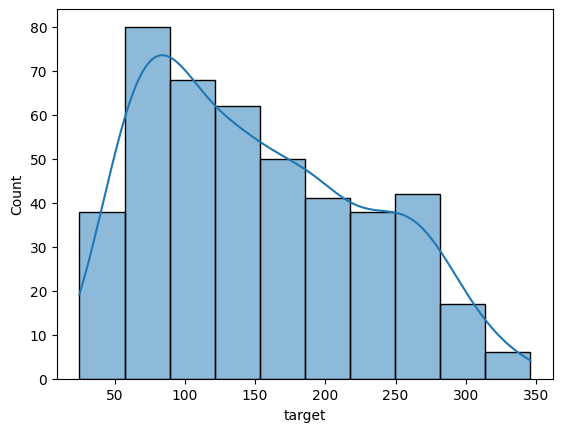

In [7]:
sns.histplot(y, kde=True)
plt.show()

## Histograma das colunas

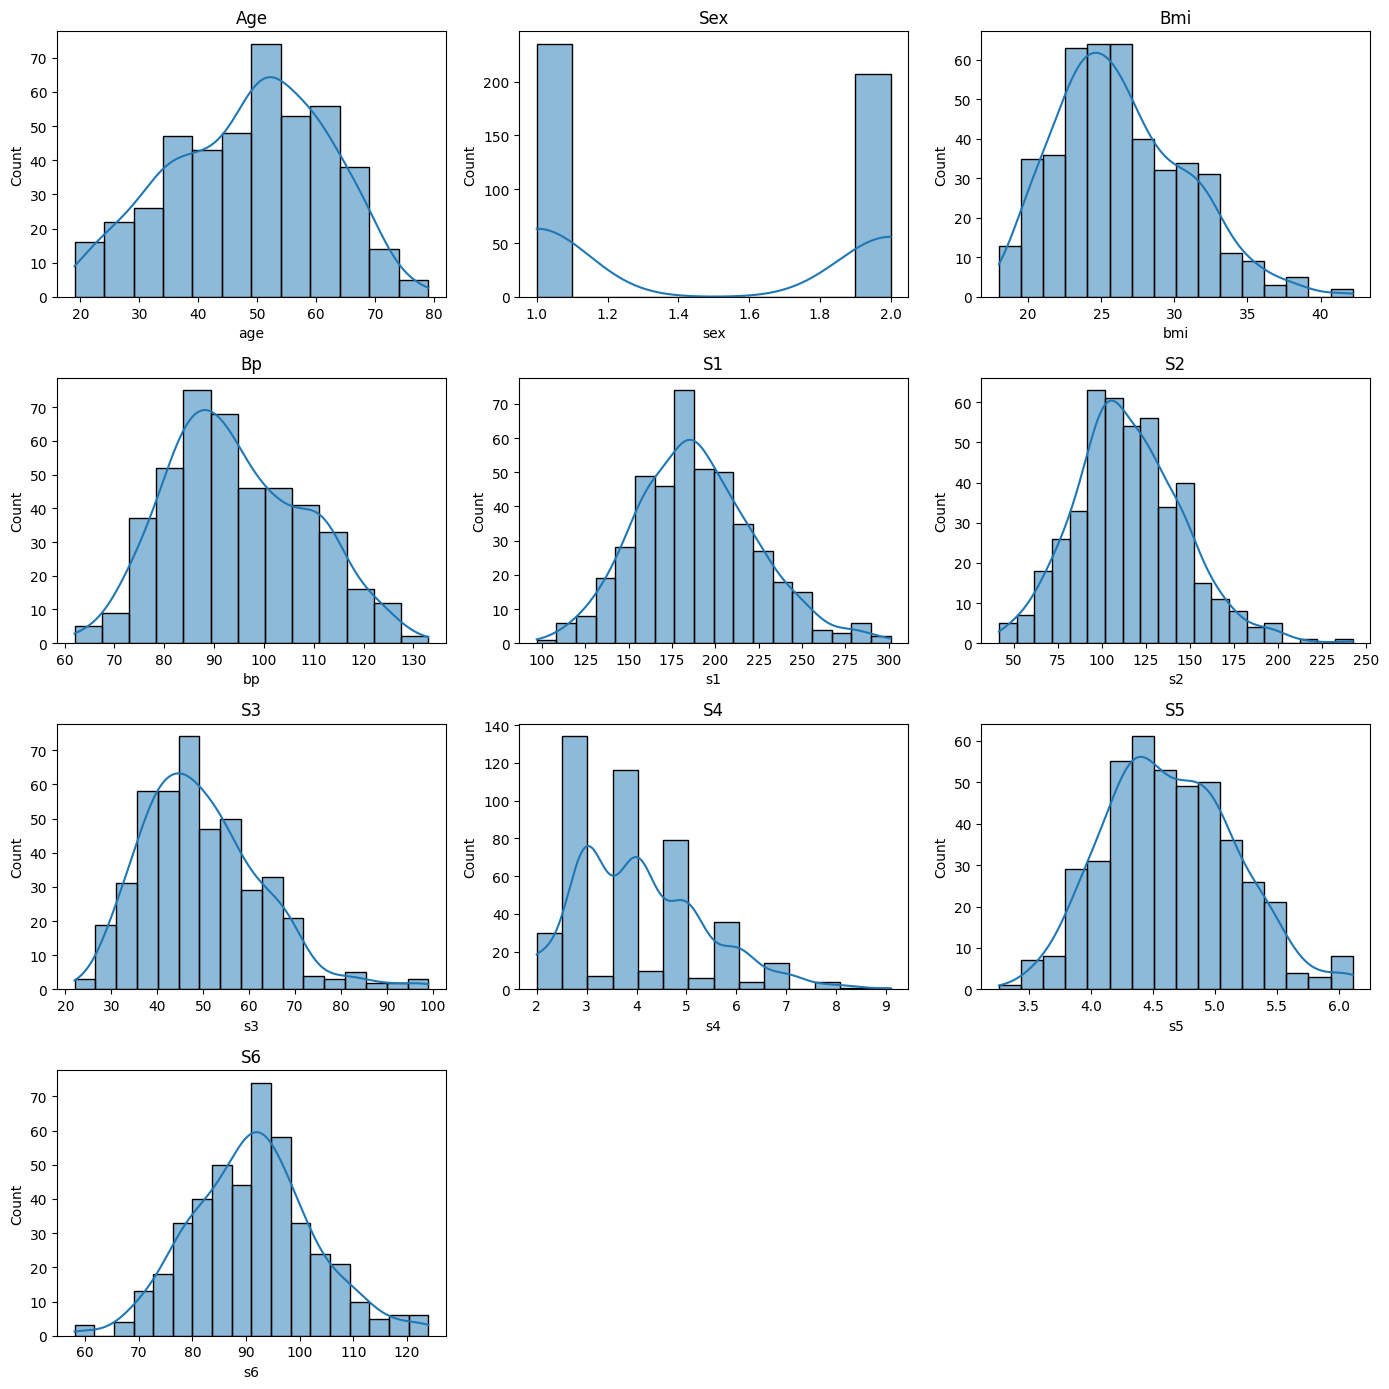

In [8]:
fig, ax = plt.subplots(4, 3, figsize=(14,14))
ax = ax.ravel()
for i, col in enumerate(X.columns):
    sns.histplot(X[col], kde=True, ax=ax[i])
    ax[i].set_title(col.capitalize())
fig.delaxes(ax[10])
fig.delaxes(ax[11])
plt.tight_layout()
plt.show()

## Gráfico de cada coluna em relação a idade, filtrados pela target

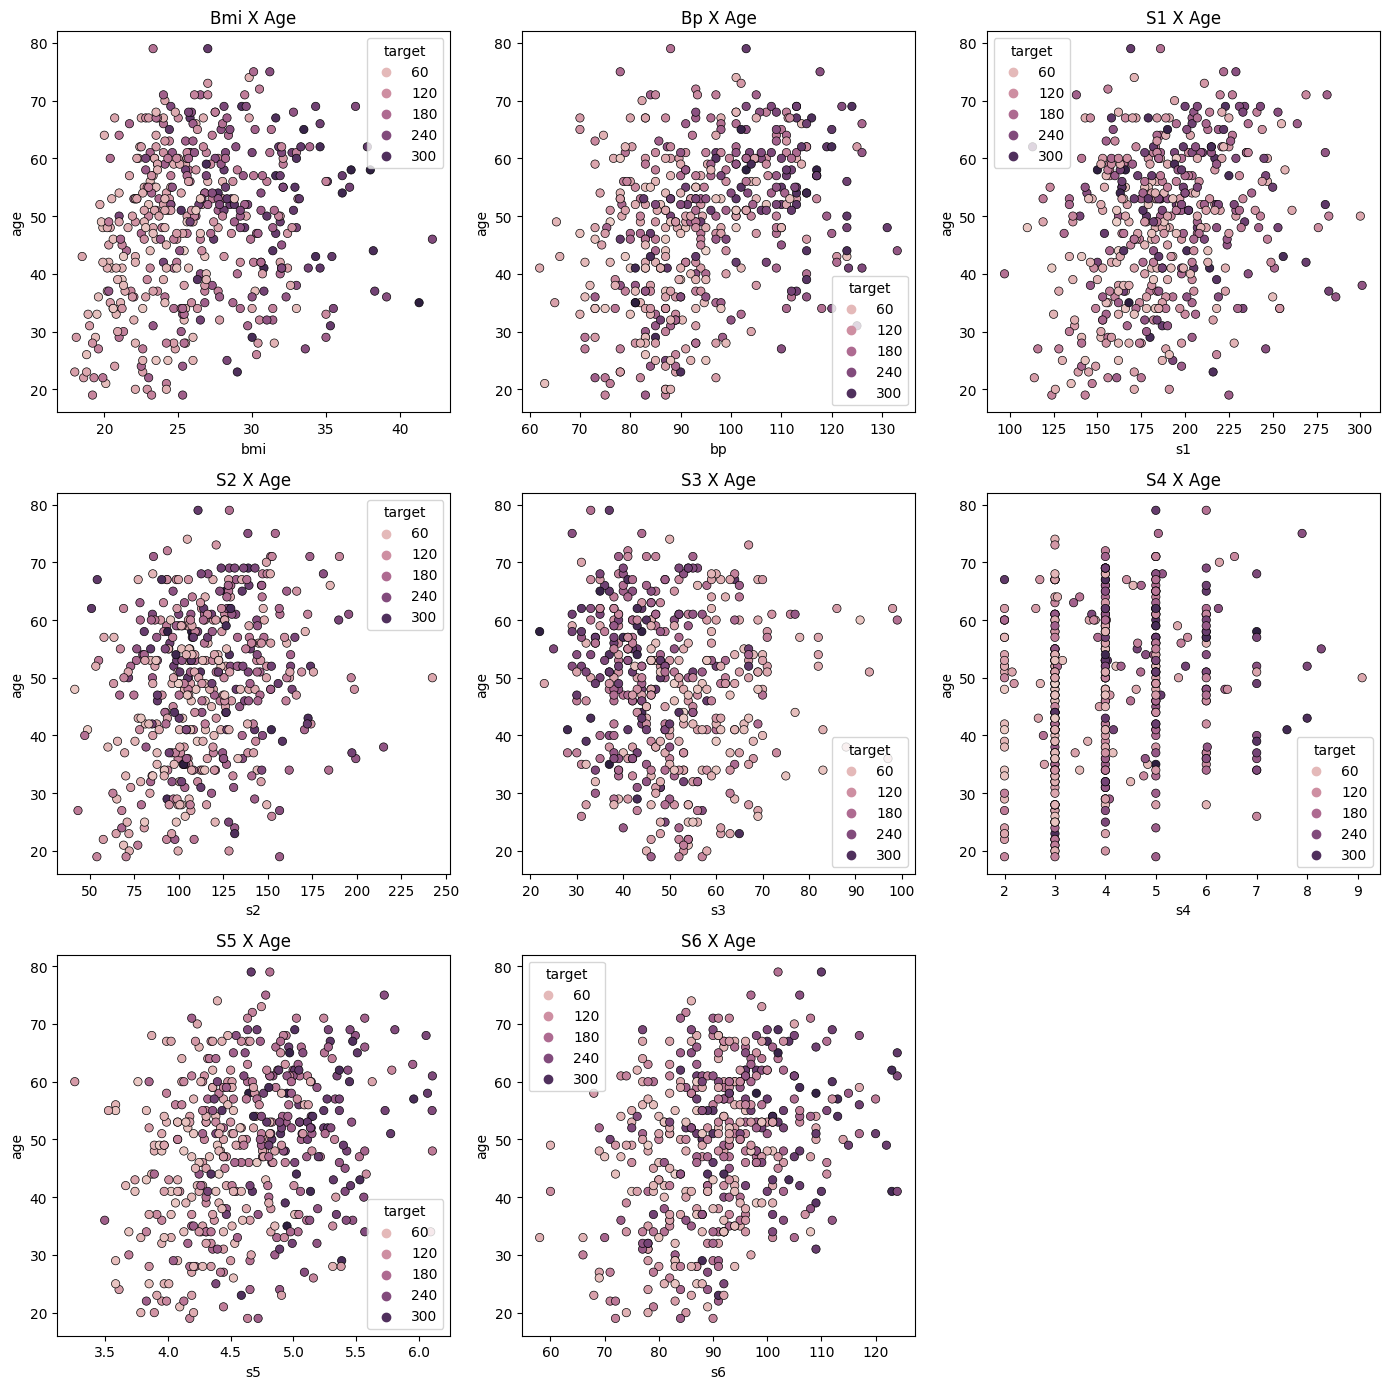

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(14,14))
ax = ax.ravel()
for i, col in enumerate(X.columns.difference(["age", "sex"])):
    sns.scatterplot(x=X[col], y=X['age'], hue=y, edgecolor='k', ax=ax[i])
    ax[i].set_title(f"{col.capitalize()} X Age")
fig.delaxes(ax[8])
plt.tight_layout()
plt.show()

# Métodos do cotovelo e silhueta para identificar o melhor número de clusters

In [10]:
inertias = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

silhouette_scores = []
for n_clusters in range(2, 13):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

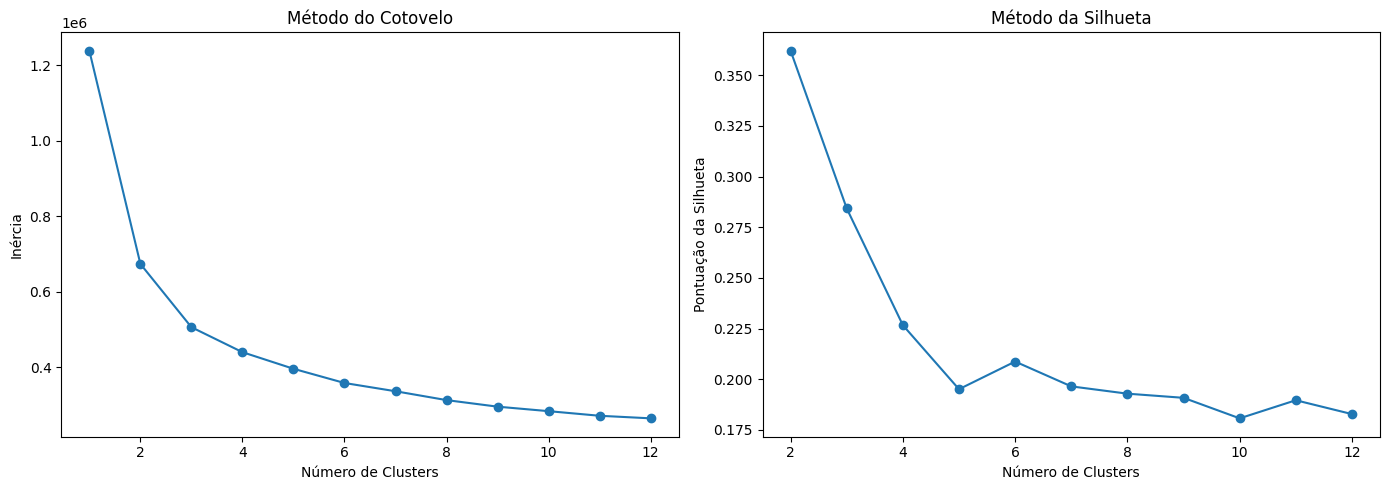

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(range(1, 13), inertias, marker='o')
axs[0].set_xlabel('Número de Clusters')
axs[0].set_ylabel('Inércia')
axs[0].set_title('Método do Cotovelo')

axs[1].plot(range(2, 13), silhouette_scores, marker='o')
axs[1].set_xlabel('Número de Clusters')
axs[1].set_ylabel('Pontuação da Silhueta')
axs[1].set_title('Método da Silhueta')

plt.tight_layout()
plt.show()

### A partir dos gráficos, podemos dizer que 3 clusters é uma boa escolha. Pelo método do cotovelo, a diferença dos valores de inércia se torna constante a partir do número 3 e pelo método da silhueta, o número 3 possui a segunda maior pontuação, com os pontos que vem após possuindo pontuações menores e ficando ali na mesma área.

# Escalonamento dos dados

In [12]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Modelos

## KMeans

In [53]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [54]:
%%time
kmeans_labels = kmeans.fit_predict(X_scaled)

CPU times: total: 156 ms
Wall time: 30 ms


In [55]:
df_kmeans = X.copy()
df_kmeans['Cluster'] = kmeans_labels
cluster_means = df_kmeans.groupby('Cluster').mean()
cluster_means

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
Cluster,,,,,,,,,,
0,40.993789,1.180124,23.377019,85.293913,172.291925,98.237267,59.503106,3.008012,4.229494,83.621118
1,53.520000,1.600000,28.734400,101.130480,226.544000,146.891200,43.224000,5.442000,5.114946,99.032000
2,52.275641,1.660256,27.580769,99.104808,176.557692,107.990385,45.022436,4.067372,4.687095,92.916667


### De acordo com a tabela comparativa, temos que o cluster 0 é formado por pessoas relativamente mais novas e que possuem menor índice de massa corporal e menor pressão sanguínea. O cluster 2 é formado por pessoas que possuem uma idade maior, além de maior índice de massa corporal e pressão sanguínea. O cluster 1 é formado por pessoas que possuem os maiores valores de índice de massa corporal e de pressão sanguínea, e também são aqueles que são mais velhos em média.

## AgglomerativeClustering

In [16]:
agg_clustering = AgglomerativeClustering(n_clusters=3)

In [17]:
%%time
agg_labels = agg_clustering.fit_predict(X_scaled)

CPU times: total: 0 ns
Wall time: 4 ms


In [18]:
df_agg = X.copy()
df_agg['Cluster'] = agg_labels
cluster_means = df_agg.groupby('Cluster').mean()
cluster_means

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
Cluster,,,,,,,,,,
0,53.634731,1.832335,28.241317,100.560778,208.383234,134.598802,41.574850,5.186048,4.985091,96.455090
1,44.394904,1.433121,22.970064,87.360892,167.000000,93.752866,58.458599,2.961401,4.243632,85.273885
2,46.762712,1.000000,28.266949,95.971780,191.364407,117.177119,49.877119,3.966441,4.684264,91.872881


### De acordo com a tabela comparativa, temos que o cluster 1 é formado por pessoas relativamente mais novas e que possuem menor índice de massa corporal e menor pressão sanguínea. O cluster 2 é formado por pessoas que possuem uma idade maior, além de maior índice de massa corporal e pressão sanguínea. O cluster 0 é formado por pessoas que possuem os mesmos valores de índice de massa corporal em relação ao cluster 2, mas possuem maiores índices de pressão sanguínea, além de serem aqueles que são mais velhos em média.

## DBScan

### Hiperparâmetro "eps" modificado para ajustar a distância máxima entre dois pontos que o modelo vai considerar como vizinhos. 

In [30]:
dbscan = DBSCAN(eps=2)

In [31]:
%%time
dbscan_labels = dbscan.fit_predict(X_scaled)

CPU times: total: 15.6 ms
Wall time: 8.01 ms


In [32]:
df_dbscan = X.copy()
df_dbscan['Cluster'] = dbscan_labels
cluster_means = df_dbscan.groupby('Cluster').mean()
cluster_means

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
Cluster,,,,,,,,,,
-1,50.410714,1.571429,28.935714,99.910714,211.696429,125.067857,46.482143,5.147857,5.134841,98.642857
0,51.462857,2.000000,26.244571,97.668514,186.725714,118.563429,44.680000,4.383257,4.658693,93.257143
1,45.573460,1.000000,25.805213,90.744028,185.156398,110.292417,54.902844,3.524645,4.496120,87.644550


In [33]:
df_dbscan['Cluster'].value_counts()

Cluster
 1    211
 0    175
-1     56
Name: count, dtype: int64

### De acordo com a tabela comparativa, temos que o cluster 1 é formado por pessoas relativamente mais novas e que possuem menor índice de massa corporal e menor pressão sanguínea. O cluster 0 é formado por pessoas que possuem uma idade maior, além de maior índice de massa corporal e pressão sanguínea. Além disso, podemos ver que 56 observações foram classificadas como ruído, não fazendo parte de um cluster.

# PCA

## Encontrando o número de componentes

In [34]:
pca = PCA()
pca.fit(X)
sorted_eigenvalues = sorted(pca.explained_variance_, reverse=True)

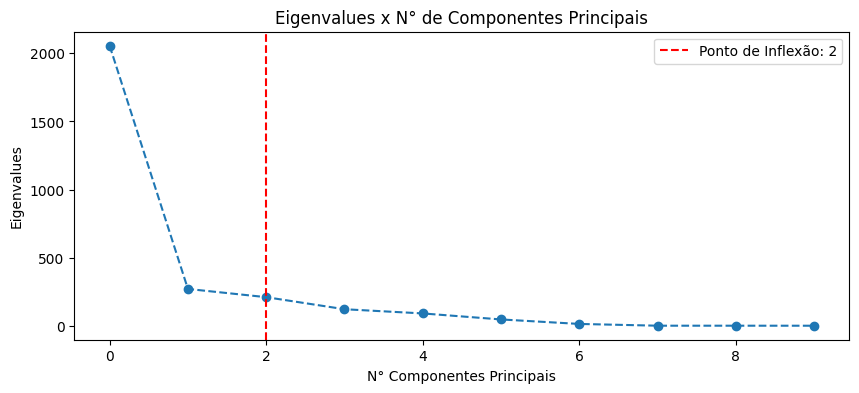

In [35]:
plt.figure(figsize=(10, 4))
plt.plot(sorted_eigenvalues, marker='o', linestyle='--')
plt.xlabel('N° Componentes Principais')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues x N° de Componentes Principais')

threshold = 0.9  #reter 95% da variância explicada acumulada
# Encontrar o ponto de inflexão
inflection_point = None
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_) #soma cumulativa da taxa de variância explicada
for i, explained_variance_ratio in enumerate(cumulative_explained_variance):
    #print(i+1, explained_variance_ratio) #i=index do valor do array (eixo x do gráfico)
    if explained_variance_ratio >= threshold: #testa se o valor da soma cumulativa da variância ultrapassa o valor de variância que queremos manter
        inflection_point = i
        break

if inflection_point:
    plt.axvline(x=inflection_point, color='r', linestyle='--', label=f'Ponto de Inflexão: {inflection_point}')
    plt.legend()

plt.show()

In [36]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

## Visualização utilizando PCA

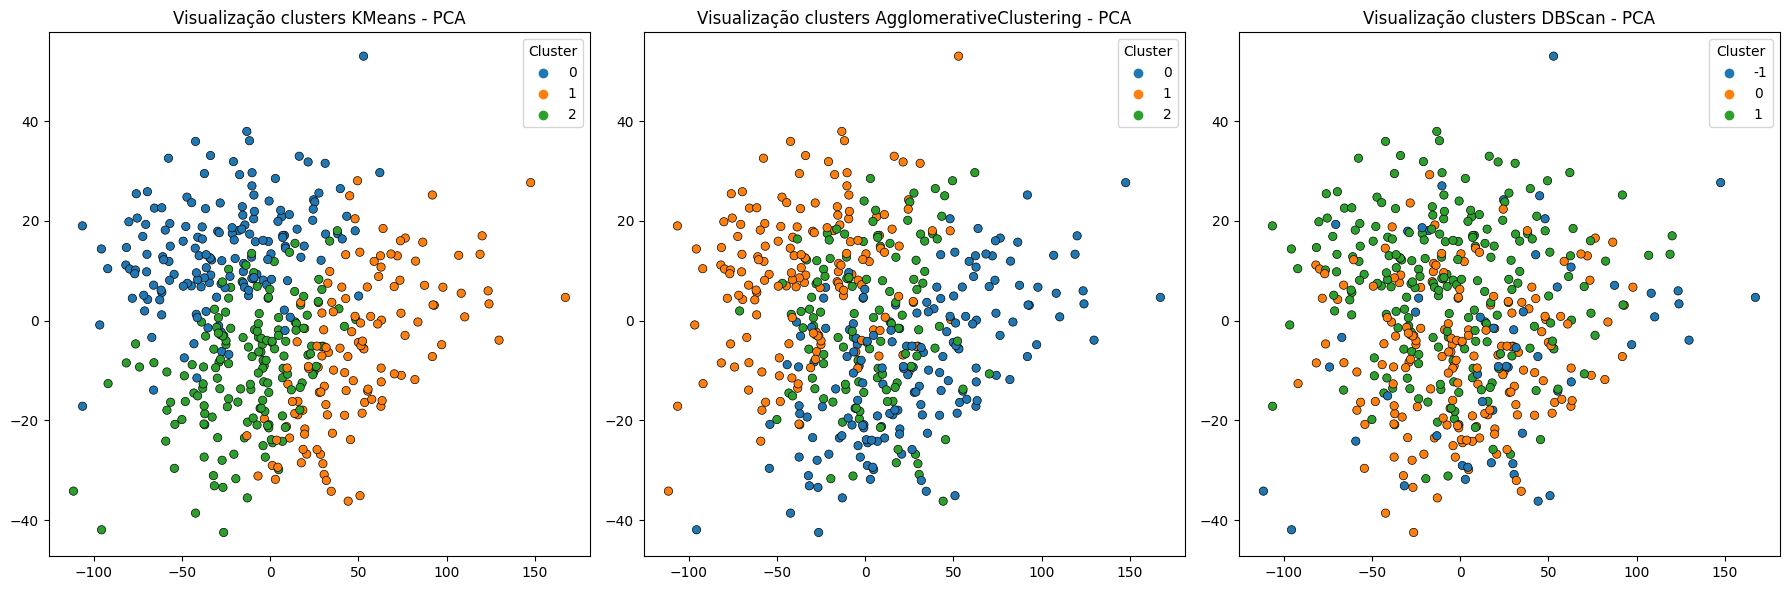

In [56]:
data_dict = {
    'KMeans': {'labels': df_kmeans['Cluster'], 'title': 'Visualização clusters KMeans - PCA'},
    'AgglomerativeClustering': {'labels': df_agg['Cluster'], 'title': 'Visualização clusters AgglomerativeClustering - PCA'},
    'DBScan': {'labels': df_dbscan['Cluster'], 'title': 'Visualização clusters DBScan - PCA'}
}
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax = ax.ravel()
for i, (models, data) in enumerate(data_dict.items()):
    scatter = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['labels'], palette='tab10', edgecolor='k', ax=ax[i])
    ax[i].set_title(data['title'])
plt.tight_layout()
plt.show()

# Escolha do modelo

## Ao realizar uma análsie visual através do PCA, podemos ver que o KMeans foi o modelo que melhor separou os dados em clusters, sendo possível visualizar as áreas de cada cluster. Alguns pontos ainda estão invadindo as áreas de outros clusters, mas numa quantidade bem reduzida em comparação com os outros modelos. O AgglomerativeClustering tem 2 clusters bem definidos, mas o terceiro está invadindo completamente o espaço dos outros. O DBScan não separou bem os dados, não sendo possível visualizar nenhuma área onde possui pontos do mesmo cluster.
## Portanto, o modelo KMeans com 3 clusters seria o escolhido.